### 스택 알아보기

- 푸시(push): 스택에 데이터를 넣는 작업
- 팝(pop): 스택에서 데이터를 꺼내는 작업
- 꼭대기(top): 스택의 윗부분
- 바닥(bottom): 스택의 아랫부분

In [1]:
# 고정 길이 스택 클래스 FixedStack 구현하기

from typing import Any

class FixedStack:
    """고정 길이 스택 클래스"""
    
    class Empty(Exception):
        """비어 있는 FixedStack에 팝 또는 피크할 때 내보내는 예외 처리"""
        pass
    
    class Full(Exception):
        """가득 찬 FixedStack에 푸시할 때 내보내는 예외 처리"""
        pass
    
    def __init__(self, capacity: int = 256) -> None:
        """스택 초기화"""
        self.stk = [None] * capacity    # 스택 본체
        self.capacity = capacity        # 스택의 크기
        self.ptr = 0                    # 스택 포인터
        
    def __len__(self) -> int:
        """스택에 쌓여 있는 데이터 개수를 반환"""
        return self.ptr
    
    def is_empty(self) -> bool:
        """스택이 비어 있는지 판단"""
        return self.ptr <= 0
    
    def is_full(self) -> bool:
        """스택이 가득 차 있는지 판단"""
        return self.ptr >= self.capacity
    
    def push(self, value: Any) -> None:
        """스택에 value를 푸시(데이터를 넣음)"""
        if self.is_full():             # 스택이 가득 차 있는 경우
            raise Fixedstack.Full     # 예외 처리 발생
        self.stk[self.ptr] = value
        self.ptr += 1
    
    def pop(self) -> Any:
        """스택에서 데이터를 팝(꼭대기 데이터를 꺼냄)"""
        if self.is_empty():            # 스택이 비어 있는 경우
            raise FixedStack.Empty    # 예외 처리 발생
        self.ptr -= 1
        return self.stk[self.ptr]
    
    def peek(self) -> Any:
        """스택에서 데이터를 피크(꼭대기 데이터를 들여다봄)"""
        if self.is_empty():             # 스택이 비어 있음
            raise FixedStack.Empty     # 예외 처리 발생
        return self.stk[self.ptr - 1]
    
    def clear(self) -> None:
        """스택을 비움(모든 데이터를 삭제)"""
        self.ptr = 0
        
    def find(self, value: Any) -> Any:
        """스택에서 value를 찾아 인덱스를 반환(없으면 -1을 반환)"""
        for i in range(self.ptr - 1, -1, -1):    # 꼭대기 쪽부터 선형 검색
            if self.stk[i] == value:
                return i                 # 검색 성공
        return -1                        # 검색 실패
    
    def count(self, value: Any) -> int:
        """스택에 있는 value의 개수를 반환"""
        c = 0
        for i in range(self.ptr):       # 바닥 쪽부터 선형 검색
            if self.stk[i] == value:    # 검색 성공
                c += 1
        return c
    
    def __contains__(self, value: Any) -> bool:
        """스택에 value가 있는지 판단"""
        return self.count(value) > 0
    
    def dump(self) -> None:
        """덤프(스택 안의 모든 데이터를 바닥부터 꼭대기 순으로 출력)"""
        if self.is_empty():                   # 스택이 비어 있음
            print('스택이 비어 있습니다.')
        else:
            print(self.stk[:self.ptr])

## 스택 프로그램 만들기

In [ ]:
# 고정 길이 스택 클래스(FixedStack)를 사용하기

from enum import enum
from fixed_stack import FixedStack

Menu = Enum('Menu', ['푸시', '팝', '피크', '검색', '덤프', '종료'])

def select_menu() -> Menu:
    """메뉴 선택"""
    s = [f'({m.value}){m.menu}' for m in Menu]
    while True:
        print(*s, sep = '  ', end = '')
        n = int(input(': '))
        if 1 <= n <= len(Menu):
            return Menu(n)
        
s = FixedStack(64)          # 최대 64개를 푸시할 수 있는 스택

while True:
    print(f'현재 데이터 개수: {len(s)} / {s.capacity}')
    menu = select_menu()
    
    if menu == Menu.푸시:      # 푸시
        x = int(input('데이터를 입력하세요.: '))
        try:
            x = s.push(x)
        except FixedStack.Full:
            print('스택이 가득 차 있습니다.')
    
    elif menu == Menu.팝:      # 팝
        try:
            x = s.pop()
            print(f'팝한 데이터는 {x}입니다.')
        except FixedStack.Empty:
            print('스택이 비어 있습니다.')
    
    elif menu == Menu.피크:      # 피크
        try:
            x = s.peak()
            print(f'피크한 데이터는 {x}입니다.')
        except FixedStack.Empty:
            print('스택이 비어 있습니다.')
            
    elif menu == Menu.검색:      # 검색
        x = int(input('검색할 값을 입력하세요.: '))
        if x in s:
            x = s.peak()
            print(f'{s.count(x)}개 포함되고, 맨 앞 위치는 {s.find(x)}입니다.')
        else:
            print('검색값을 찾을 수 없습니다.')
    
    elif menu == Menu.덤프:     # 덤프
         s.dump()
            
    else:
        break

#### collection.deque로 스택 구현하기

파이썬의 내장 컨테이너는 딕셔너리, 리스트, 집합, 튜플이 있습니다. 이 외에도 여러 컨테이너를 collection 모듈로 제공합니다. 주요 컨테이너는 namedtuple(), deque(), ChainMap, Counter, OrderedDict, defaultdict, UserDict, UserList, UserString 같은 컬렉션입니다. 이 가운데 deque 모듈을 사용하면 스택을 간단하게 구현할 수 있습니다. collection.deque는 맨 앞과 맨 끝 양쪽에서 원소를 추가, 삭제하는 자료구조인 덱을 구현하는 컨테이너입니다. deque의 주요 속성과 함수를 다음과 같이 나타냈습니다.

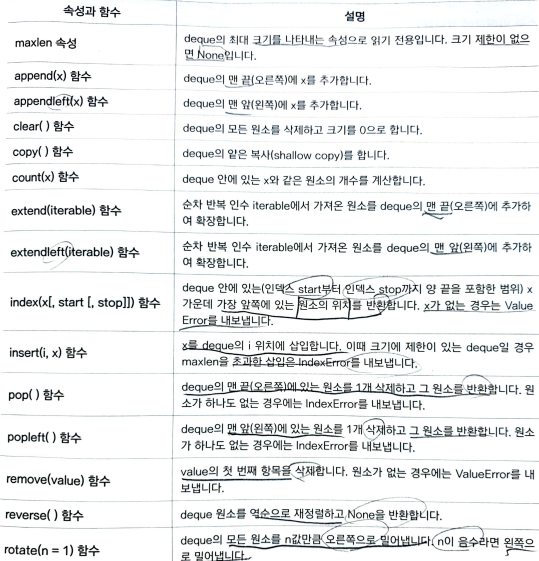

In [2]:
# 고정 길이 스택 클래스 구현하기(collection.deque를 사용)

from typing import Any
from collections import deque

class Stack:
    """고정 길이 스택 클래스(collections.deque를 사용)"""
    
    def __init__(self, maxlen: int = 256) -> None:
        """스택 초기화"""
        self.capacity = maxlen
        self.__stk = deque([], maxlen)
        
    def __len__(self) -> int:
        """스택에 쌓여 있는 데이터 개수를 반환"""
        return len(self.__stk)
    
    def is_empty(self) -> bool:
        """스택이 비어 있는지 판단"""
        return not self.__stk
    
    def is_full(self) -> bool:
        """스택이 가득 차 있는지 판단"""
        return len(self.__stk) == self.__stk.maxlen
    
    def push(self, value: Any) -> None:
        """스택에 value를 푸시"""
        self.__stk.append(value)
        
    def pop(self) -> Any:
        """스택에서 데이터를 팝"""
        return self.__stk.pop()
    
    def peek(self) -> Any:
        """스택에서 데이터를 피크"""
        return self._stk[-1]
    
    def clear(self) -> None:
        "스택을 비움"
        self.__stk.clear()
        
    def find(self, value: Any) -> Any:
        """스택에서 value를 찾아 인덱스를 반환(찾지 못하면 -1을 반환)"""
        try:
            return self.__stk.index(value)
        except:
            return -1
    
    def count(self, value: Any) -> int:
        """스택에 포함되어 있는 value의 개수를 반환"""
        return self.__stk.count(value)
    
    def __contains__(self, value: Any) -> bool:
        """스택에 value가 포함되어 있는지 판단"""
        return self.count(value)
    
    def dump(self) -> int:
        """스택 안에 있는 모든 데이터를 나열(바닥에서 꼭대기 순으로 출력)"""
        print(list(self.__stk))

In [ ]:
# 고정 길이 스택 클래스(collections.deque)를 사용하기

from enum import Enum
from stack import Stack

Menu = Enum('Menu', ['푸시', '팝', '피크', '검색', '덤프', '종료'])

def select_menu() -> Menu:
    """메뉴 선택"""
    s = [f'({m.value}){m.name}' for m in Menu]
    while True:
        print(*s, sep='  ', end='')
        n = int(input('：'))
        if 1 <= n <= len(Menu):
            return Menu(n)

s = Stack(64)  # 최대 64 개를 푸시할 수 있는 스택

while True:
    print(f'현재 데이터 개수：{len(s)} / {s.capacity}')
    menu = select_menu()  # 메뉴 선택

    if menu == Menu.푸시:  # 푸시
        x = int(input('데이터：'))
        try:
            s.push(x)
        except IndexError:
            print('스택이 가득 찼습니다.')

    elif menu == Menu.팝:  # 팝
        try:
            x = s.pop()
            print(f'팝한 데이터는 {x}입니다.')
        except IndexError:
           print('스택이 비어 있습니다.')

    elif menu == Menu.피크:  # 피크
        try:
            x = s.peek()
            print(f'피크한 데이터는 {x}입니다.')
        except IndexError:
           print('스택이 비어 있습니다.')

    elif menu == Menu.검색:  # 검색
        x = int(input('검색 값을 입력하세요：'))
        if x in s:
            print(f'{s.count(x)} 개를 포함하고, 맨 앞쪽의 위치는 {s.find(x)}입니다.')
        else:
            print('검색 값은 포함되어 있지 않습니다.')
            
    elif menu == Menu.덤프:  # 덤프
        s.dump()

    else:
        break